In [3]:
import os
import struct
from array import array


class MNIST(object):
    def __init__(self, path='.'):
        self.path = path

        self.test_img_fname = 't10k-images-idx3-ubyte'
        self.test_lbl_fname = 't10k-labels-idx1-ubyte'

        self.train_img_fname = 'train-images-idx3-ubyte'
        self.train_lbl_fname = 'train-labels-idx1-ubyte'

        self.test_images = []
        self.test_labels = []

        self.train_images = []
        self.train_labels = []

    def load_testing(self):
        ims, labels = self.load(os.path.join(self.path, self.test_img_fname),
                                os.path.join(self.path, self.test_lbl_fname))

        self.test_images = ims
        self.test_labels = labels

        return ims, labels

    def load_training(self):
        ims, labels = self.load(os.path.join(self.path, self.train_img_fname),
                                os.path.join(self.path, self.train_lbl_fname))

        self.train_images = ims
        self.train_labels = labels

        return ims, labels

    @classmethod
    def load(cls, path_img, path_lbl):
        with open(path_lbl, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049,'
                                 'got {}'.format(magic))

            labels = array("B", file.read())

        with open(path_img, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051,'
                                 'got {}'.format(magic))

            image_data = array("B", file.read())

        images = []
        for i in range(size):
            images.append([0] * rows * cols)

        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

        return images, labels

    @classmethod
    def display(cls, img, width=28, threshold=200):
        render = ''
        for i in range(len(img)):
            if i % width == 0:
                render += '\n'
            if img[i] > threshold:
                render += '@'
            else:
                render += '.'
        return render

In [7]:
pip install tensorflow

  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.2 kB ? eta -:--:--
     ------------------------- ------------ 30.7/46.2 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 287.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB 326.8 kB/s eta 0:19:14
   ---------------------------------------- 0.0/377.0 MB 326.8 kB/s eta 0:19:14
   ---------------------------------------- 0.1/377.0 MB 272.3 kB/s eta 0:23:04
   ---------------------------------------- 0.1/377.0 MB 272.3 kB/s eta 0:23:04
   ---------------------

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl (377.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow.keras.datasets import mnist

C:\Users\thabu\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [9]:
style.use('ggplot')


Loading MNIST Data...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

Preparing Classifier Training and Validation Data...

KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10

Pickling the Classifier for Future Use...

Loading Pickled Classifier...

Calculating Accuracy of Trained Classifier...

KNN Trained Classifier Confidence:  0.9735

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Accuracy of Classifier on Validation Image Data:  0.9735

Creating Confusion Matrix...

Confusion Matrix: 
 [[619   0   1   0   0   1   3   0   0   0]
 [  0 653   0   0   0   0   0   1   0   0]
 [  0   5 550   2   3   1   1   8   1   1]
 [  0   0   6 571   0   7   0   1   1   3]
 [  0   6   1   1 556   0   0   1   0  15]
 [  3   2   0   6   0 535   1   0   2   2]
 [  1   1   0   0   1   1 576   0   0   0]
 [  0  14   1   0   1   0   0 615   1   1]
 [  0   5   3   8   4  10   1   0 550   4]
 [  1   0   1   2   5   1   0   6   0 616]]


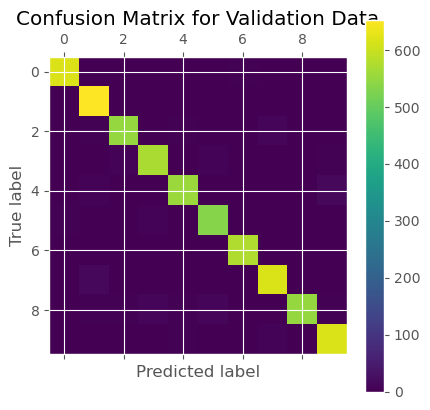


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data...

Accuracy of Classifier on Test Images:  0.9681

Creating Confusion Matrix for Test Data...

Confusion Matrix for Test Data: 
 [[ 974    1    1    0    0    0    2    1    1    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  989    2    1    0    1   16    4    0]
 [   0    3    3  978    1   12    1    6    2    4]
 [   3    8    0    0  939    0    4    2    1   25]
 [   4    0    0   11    2  863    6    1    2    3]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   23    4    0    3    0    0  989    0    9]
 [   7    3    4   13    7   19    3    5  910    3]
 [   5    7    3    5    8    5    1   12    2  961]]


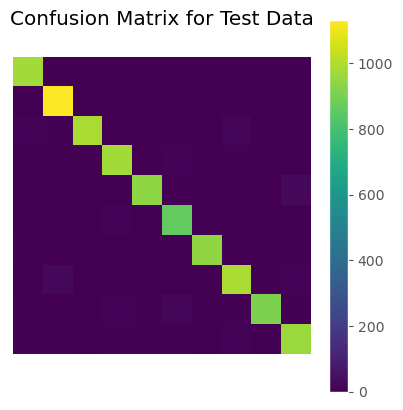

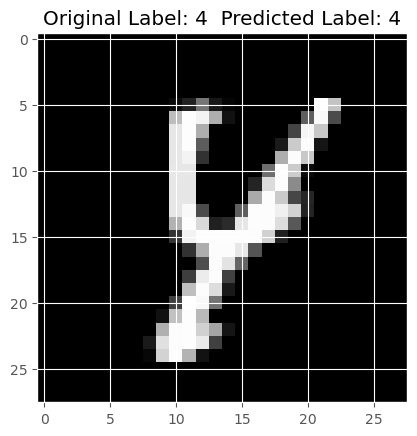

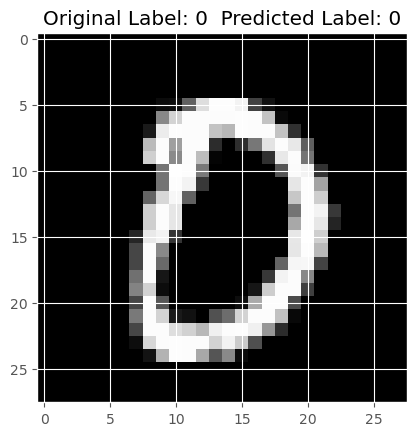

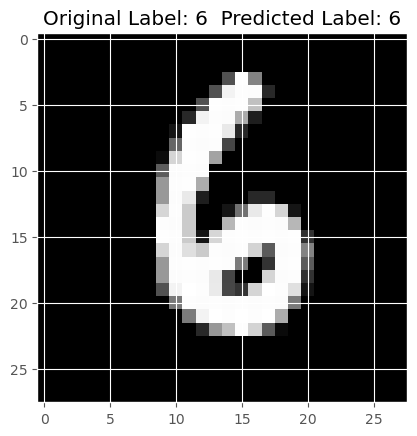

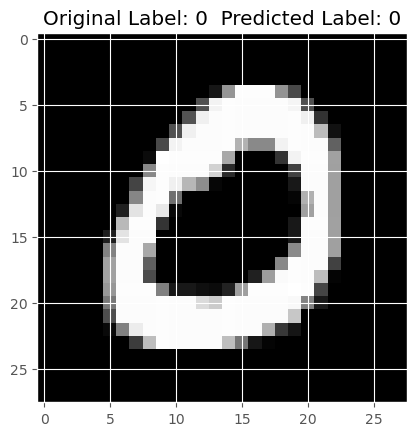

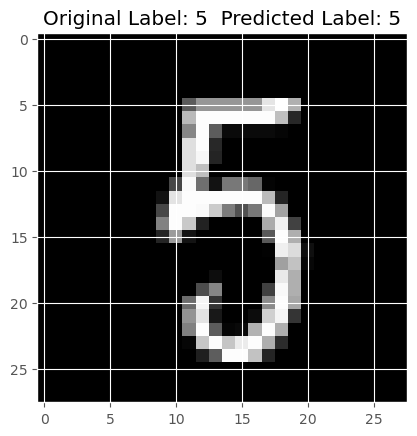

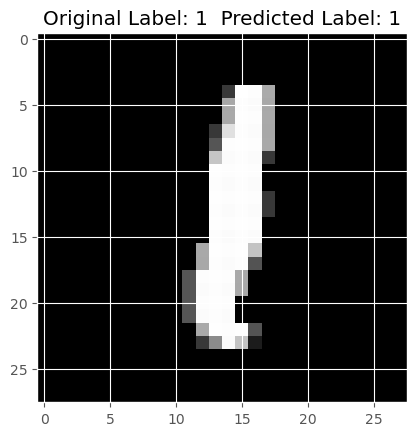

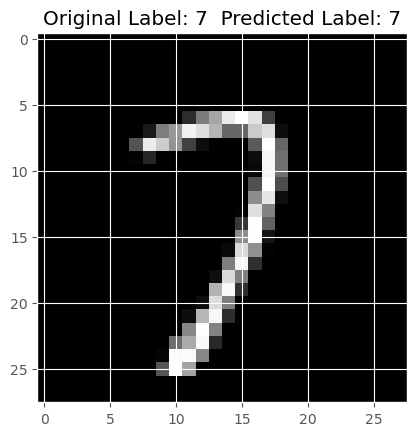

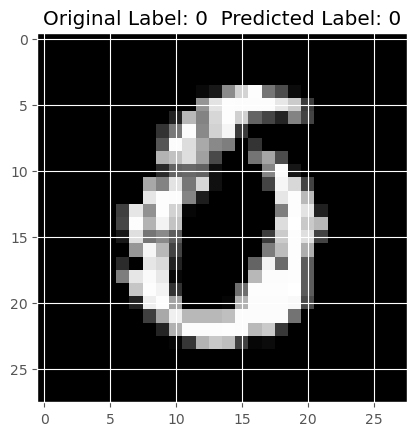

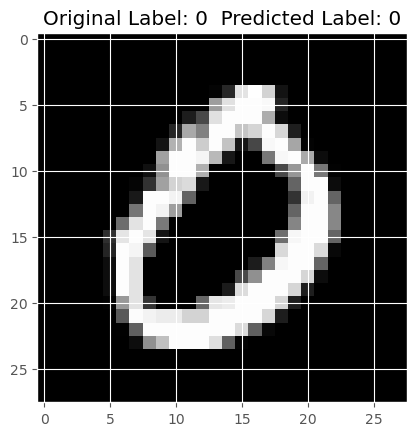

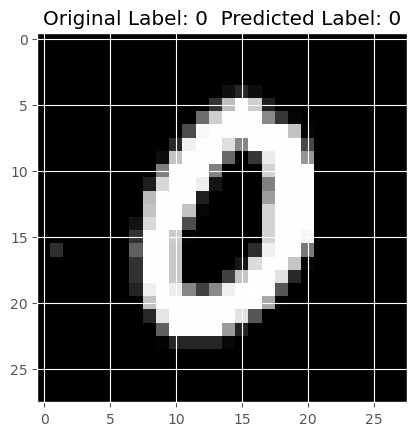

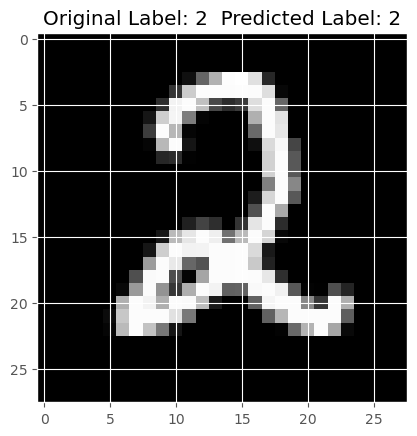

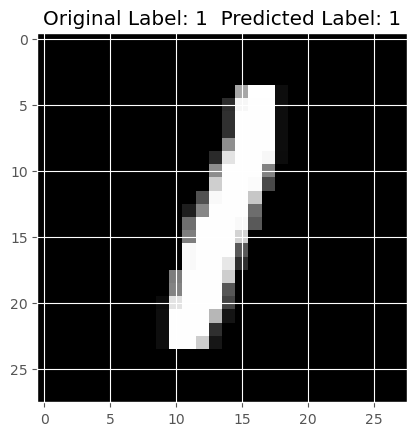

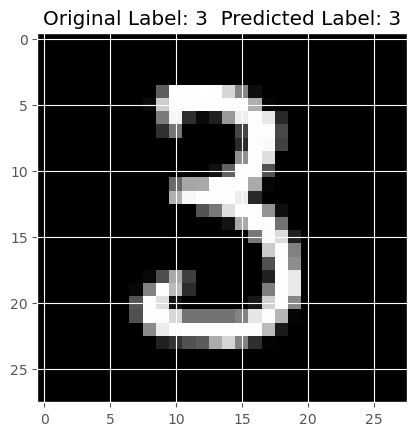

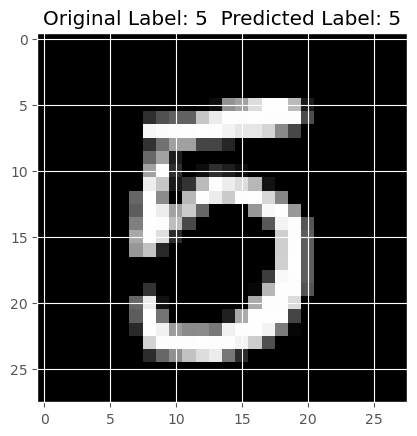

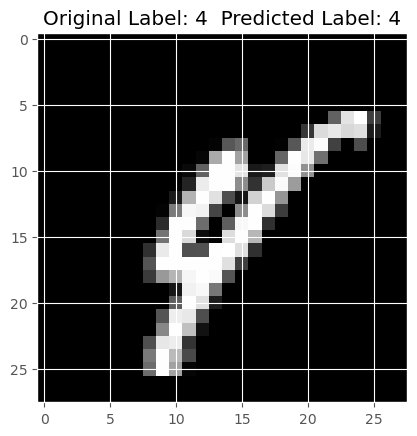

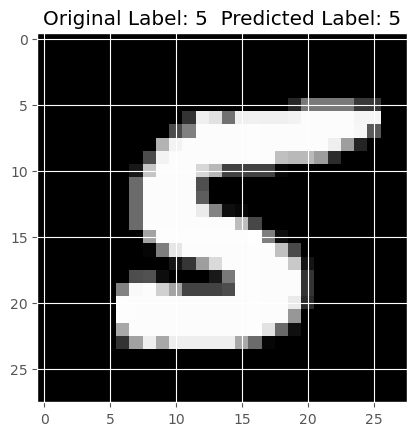

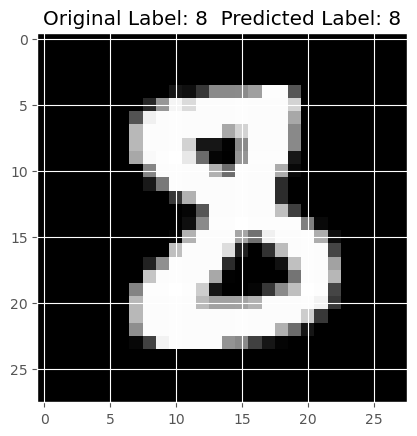

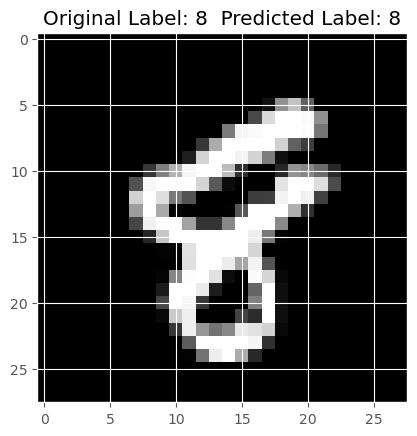

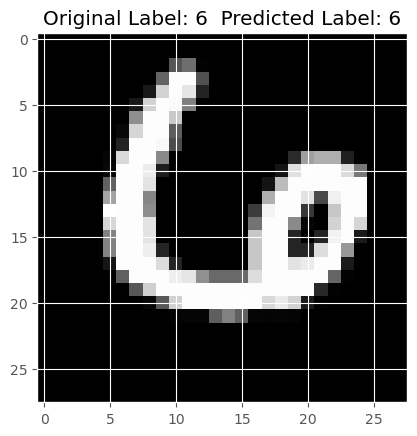

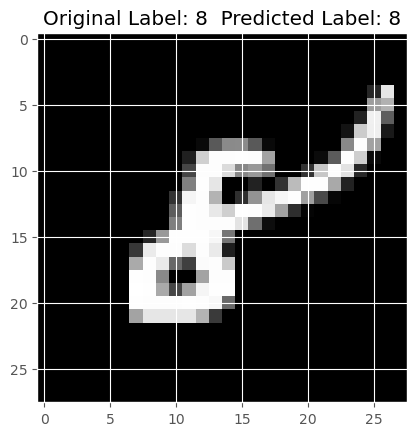

In [10]:
def main():
    print('\nLoading MNIST Data...')
    (train_img, train_labels), (test_img, test_labels) = mnist.load_data()

    # Flatten images for KNN classifier
    train_img = train_img.reshape((train_img.shape[0], -1))
    test_img = test_img.reshape((test_img.shape[0], -1))

    print('\nPreparing Classifier Training and Validation Data...')
    X_train, X_test, y_train, y_test = train_test_split(train_img, train_labels, test_size=0.1, random_state=42)

    print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
    clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10)
    clf.fit(X_train, y_train)

    print('\nPickling the Classifier for Future Use...')
    with open('MNIST_KNN.pickle', 'wb') as f:
        pickle.dump(clf, f)

    print('\nLoading Pickled Classifier...')
    with open('MNIST_KNN.pickle', 'rb') as pickle_in:
        clf = pickle.load(pickle_in)

    print('\nCalculating Accuracy of Trained Classifier...')
    confidence = clf.score(X_test, y_test)
    print('\nKNN Trained Classifier Confidence: ', confidence)

    print('\nMaking Predictions on Validation Data...')
    y_pred = clf.predict(X_test)

    print('\nCalculating Accuracy of Predictions...')
    accuracy = accuracy_score(y_test, y_pred)
    print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)

    print('\nCreating Confusion Matrix...')
    conf_mat = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix: \n', conf_mat)

    # Plot Confusion Matrix Data as a Matrix
    plt.matshow(conf_mat)
    plt.title('Confusion Matrix for Validation Data')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print('\nMaking Predictions on Test Input Images...')
    test_labels_pred = clf.predict(test_img)

    print('\nCalculating Accuracy of Trained Classifier on Test Data...')
    acc = accuracy_score(test_labels, test_labels_pred)
    print('\nAccuracy of Classifier on Test Images: ', acc)

    print('\nCreating Confusion Matrix for Test Data...')
    conf_mat_test = confusion_matrix(test_labels, test_labels_pred)
    print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

    # Plot Confusion Matrix for Test Data
    plt.matshow(conf_mat_test)
    plt.title('Confusion Matrix for Test Data')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.axis('off')
    plt.show()

    # Show the Test Images with Original and Predicted Labels
    a = np.random.randint(0, test_img.shape[0], 20)
    for i in a:
        two_d = np.reshape(test_img[i], (28, 28))
        plt.title(f'Original Label: {test_labels[i]}  Predicted Label: {test_labels_pred[i]}')
        plt.imshow(two_d, interpolation='nearest', cmap='gray')
        plt.show()

if __name__ == '__main__':
    main()